# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the 2 best performers of the study group. This can be inferred by looking at the summary statistics dataframe.
- Ketapril and Naftisol are the 2 worst performers as you can see in the summary statistics, they have the largest mean and median tumor size but also the largest variance and standard deviation.
- When you drill down to just 1 mouse using Capomulin, you can see the positive affect the drug regimen had in reducing the volume of the tumor.
- When examining the Capomulin drug regimen you can see the very clear correlation between average tumor volume with the weight of th mice. As the mouse weight increases the tumor volume increases in a fairly predictable manner.  

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#study_results
#mouse_metadata.columns
# Combine the data into a single DataFrame
merged_data = study_results.merge(mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
merged_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [5]:
# Checking the number of mice.
len(merged_data.value_counts('Mouse ID'))


249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = merged_data[merged_data.duplicated(subset = ['Mouse ID', 'Timepoint'])]['Mouse ID']
duplicate

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_IDs = merged_data[merged_data['Mouse ID'].isin(duplicate)]
duplicate_IDs

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"] != "g989"]
cleaned_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [9]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data.value_counts('Mouse ID'))

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = cleaned_data.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].mean(numeric_only=True)
#mean_tumor
median_tumor = cleaned_data.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].median(numeric_only=True)
#median_tumor
variance_tumor = cleaned_data.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].var(numeric_only=True)
#variance_tumor
std_dev_tumor = cleaned_data.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].std(numeric_only=True)
#std_dev_tumor
sem_tumor = cleaned_data.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].sem(numeric_only=True)
#sem_tumor

summary_tumor_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor,
    'Median Tumor Volume': median_tumor,
    'Tumor Volume Variance': variance_tumor,
    'Tumor Volume Std. Dev.': std_dev_tumor,
    'Tumor Volume Std. Err.': sem_tumor
})

summary_tumor_stats

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_method = cleaned_data.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('mean'),
    ('median'),
    ('var'),
    ('std'),
    ('sem')
])
advanced_method

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

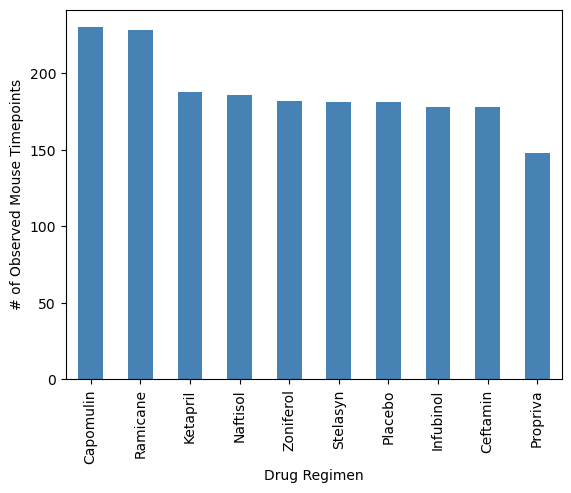

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_counts = cleaned_data['Drug Regimen'].value_counts()

bar_chart = bar_counts.plot(kind='bar', color='steelblue')

bar_chart.set_xlabel('Drug Regimen')
bar_chart.set_ylabel('# of Observed Mouse Timepoints')

bar_chart

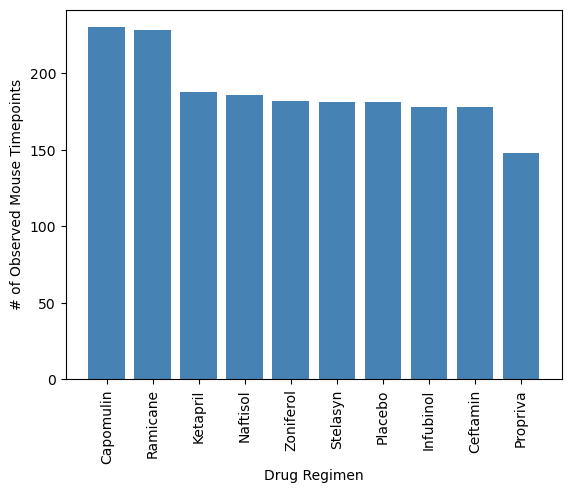

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_counts.index, bar_counts.values, color='steelblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xticks(rotation = 90)

plt.show()

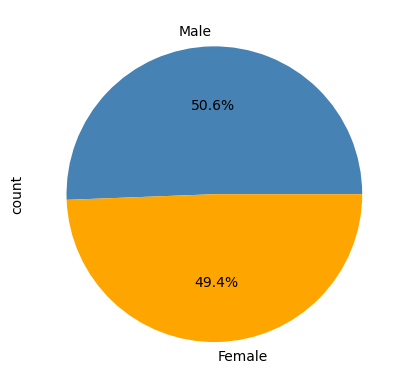

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Here i used 'merged_data' to match the numbers that are in the starter code,
# but i believe we should be using the 'cleaned_data' that has the duplicates removed. 
gender_data = merged_data["Sex"].value_counts()
gender_data 
# Make the pie chart
pie_chart = gender_data.plot(kind='pie', colors=['steelblue','orange'], autopct='%1.1f%%')

#pie_chart.set_xlabel('Sex')
#pie_chart.set_ylabel('count')

#pie_chart

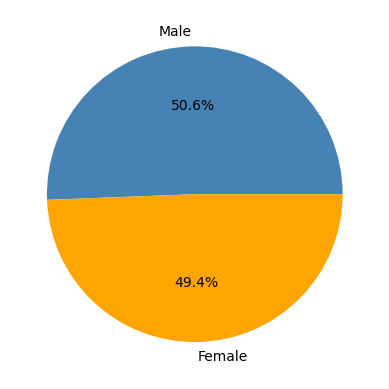

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# did this above

# Make the pie chart
plt_pie = plt.pie(gender_data, labels=gender_data.index, colors=['steelblue', 'orange'], autopct='%1.1f%%')

plt.show()
  

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
select_regimens = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
#select_regimens
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = select_regimens.groupby(['Mouse ID','Drug Regimen'])['Timepoint'].max().reset_index()
#max_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
select_merged = pd.merge(max_timepoints, select_regimens, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])

last_tumor_df = select_merged[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]
last_tumor_df

Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)  Weight (g)
0      a203    Infubinol         45           67.973419          23
1      a251    Infubinol         45           65.525743          25
2      a275     Ceftamin         45           62.999356          28
3      a411     Ramicane         45           38.407618          22
4      a444     Ramicane         45           43.047543          25
..      ...          ...        ...                 ...         ...
95     y769     Ceftamin         45           68.594745          27
96     y793    Capomulin         45           31.896238          17
97     y865     Ceftamin         45           64.729837          26
98     z578     Ramicane         45           30.638696          16
99     z581    Infubinol         45           62.754451          25

[100 rows x 5 columns]

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_selected = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
def calc_iqr_outliers(df, column):
    quartiles = df[column].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = df[(df[column] < lowerq) | (df[column] > upperq)]
    return quartiles, lowerq, upperq, iqr, lower_bound, upper_bound, outliers

for regimen in regimens_selected:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_df = last_tumor_df[last_tumor_df['Drug Regimen'] == regimen]
    tumor_vol_data.append(regimen_df['Tumor Volume (mm3)'])
    
    # add subset
    quartiles, lowerq, upperq, iqr, lower_bound, upper_bound, outliers = calc_iqr_outliers(regimen_df, 'Tumor Volume (mm3)')


    # Determine outliers using upper and lower bounds
    print(f"{regimen} potential outliers: {outliers['Tumor Volume (mm3)'].min()} {outliers['Tumor Volume (mm3)'].max()}")

Capomulin potential outliers: 23.34359787 47.68596303
Ramicane potential outliers: 22.05012627 45.22086888
Infubinol potential outliers: 36.3213458 72.2267309
Ceftamin potential outliers: 45.0 68.92318457


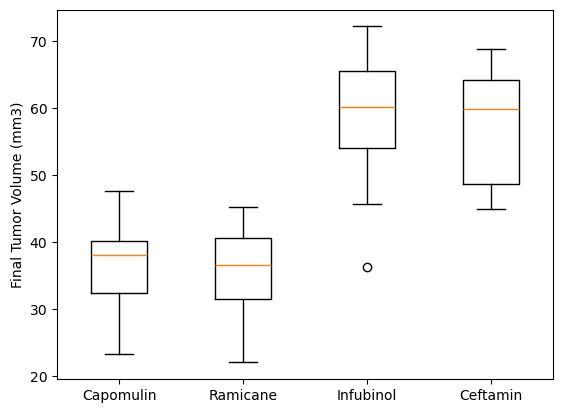

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=regimens_selected)
plt.show()

## Line and Scatter Plots

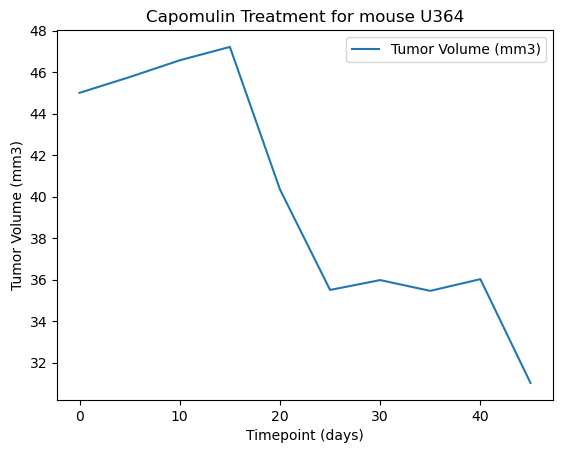

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 'u364')]

# Line Chart
line_chart = capomulin_mouse.plot.line('Timepoint', 'Tumor Volume (mm3)')

# Setting Title, X & Y Axis
line_chart.set_title('Capomulin Treatment for mouse U364')
line_chart.set_xlabel('Timepoint (days)')
line_chart.set_ylabel('Tumor Volume (mm3)')

plt.show()

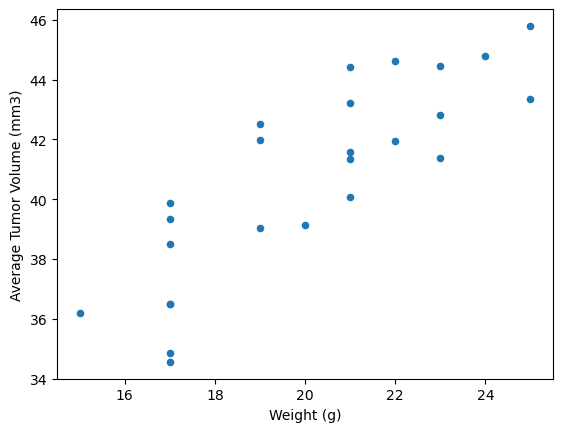

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filtering data to capomulin data
capomulin_cohort = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin')]

# Finding average size of tumors by Mouse
average_capomulin = capomulin_cohort.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Renaming field to be average
average_capomulin = average_capomulin.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'}) 

# Getting the weights from the capoumlin filtered data and merging to the average tumor data
weights = capomulin_cohort[['Mouse ID','Weight (g)']].drop_duplicates()
average_capomulin = average_capomulin.merge(weights, on='Mouse ID')

# Scatter Plot
scatter_plot = average_capomulin.plot.scatter('Weight (g)','Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


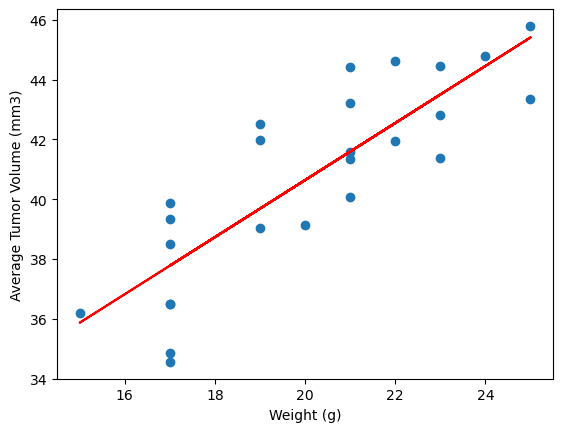

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation, p_value = st.pearsonr(average_capomulin['Weight (g)'], average_capomulin['Average Tumor Volume (mm3)'])

# Print the correlation
print(f'The correlation between mouse weight and the average tumor volume is {correlation:.2f}')

x = average_capomulin['Weight (g)']
y = average_capomulin['Average Tumor Volume (mm3)']

cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(x, y)

cap_fit = cap_slope * x + cap_int
plt.scatter(x, y)
plt.plot(x, cap_fit, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
